# NB CAR AD DATASET
Using the above dataset to build a Naive Bayes Model to predict the nature of the ADs.

## BUSINESS OBJECTIVE
* Maximize Accurate prediction
* Minimize Fake Ads 
* Maximize Sales

## CONSTRAINTS
* Recession
* Highly competitive

## DATA DICTIONARY

| **slno** | **Name of Feature** | **Description**                                         | **Type** | **Relevance** |
|:--------:|:-------------------:|:--------------------------------------------------------|:--------:|:-------------:|
| 1        | User ID             | User Id of the customer                                 | Count    | Irrelevant    |
| 2        | Gender              | Gender of the customer                                  | Nominal  | Relevant      |
| 3        | Age                 | Age of the customer                                     | Ratio    | Relevant      |
| 4        | EstimatedSalary     | Estimated salary of the customer                        | Ratio    | Relevant      |
| 5        | Purchased           |  Dependent Variable : Purchased '1' & Not Purchased '0' | Binary   | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:

df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass14\NB_Car_Ad.csv")
df=df0.copy()
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(400, 5)

In [4]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [9]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64


Dropping the 'User ID' column as it is irrelevant for the analysis. 

In [10]:
df=df.drop(['User ID'],axis=1)

### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [11]:
df.mean()

C:\Users\lenny\AppData\Local\Temp\ipykernel_15748\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Age                   37.6550
EstimatedSalary    69742.5000
Purchased              0.3575
dtype: float64

In [12]:
df.median()

C:\Users\lenny\AppData\Local\Temp\ipykernel_15748\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Age                   37.0
EstimatedSalary    70000.0
Purchased              0.0
dtype: float64

In [13]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_15748\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)
C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\lenny\AppData\Local\Temp\ipykernel_15748\4235401754.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/r

ModeResult(mode=array([['Female', 35, 72000, 0]], dtype=object), count=array([[204,  32,  12, 257]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [14]:
df.var()

C:\Users\lenny\AppData\Local\Temp\ipykernel_15748\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Age                1.098907e+02
EstimatedSalary    1.162603e+09
Purchased          2.302694e-01
dtype: float64

In [15]:
df.std()

C:\Users\lenny\AppData\Local\Temp\ipykernel_15748\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Age                   10.482877
EstimatedSalary    34096.960282
Purchased              0.479864
dtype: float64

In [16]:
Range=df[['Age','EstimatedSalary']].max()-df[['Age','EstimatedSalary']].min()
Range

Age                    42
EstimatedSalary    135000
dtype: int64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [17]:
df.skew()

C:\Users\lenny\AppData\Local\Temp\ipykernel_15748\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Age                0.231337
EstimatedSalary    0.495024
Purchased          0.596903
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [18]:
df.kurt()

C:\Users\lenny\AppData\Local\Temp\ipykernel_15748\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Age               -0.622513
EstimatedSalary   -0.405878
Purchased         -1.651992
dtype: float64

### GRAPHICAL REPRESENTATION

Plotting histograms of each variable.

C:\Users\lenny\AppData\Local\Temp\ipykernel_15748\522995607.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

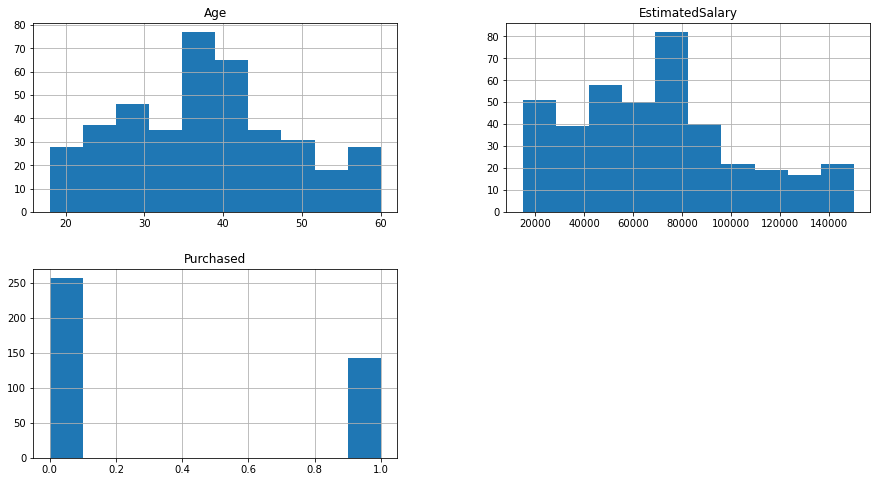

In [19]:
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
df.hist(ax=ax)
plt.show

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


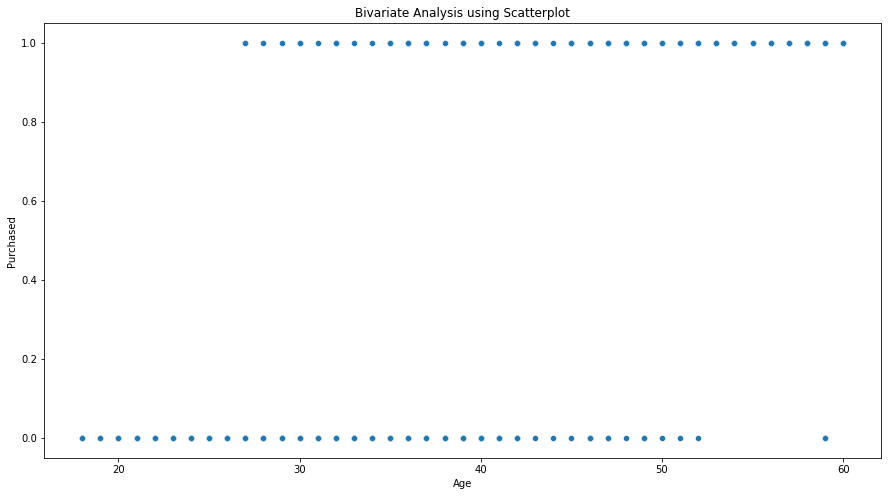

In [20]:
plt.figure(figsize=(15,8))
sns.scatterplot(df.Age,df['Purchased'])
plt.title("Bivariate Analysis using Scatterplot")
plt.show()

Plotting boxplots of each variable.

In [21]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

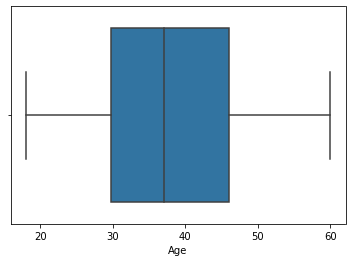

In [22]:
sns.boxplot(df["Age"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

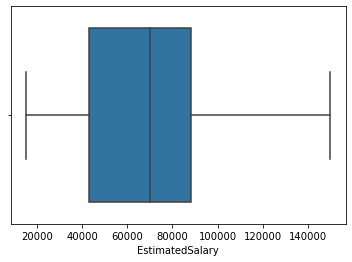

In [23]:
sns.boxplot(df['EstimatedSalary'])

From the boxplots it is evident that there are no outliers in the data. 

### MODEL BUILDING

Splitting the dataset into dependent and independent variables. Here purchase is the only dependent variable

In [24]:
X=df.drop(['Purchased'],axis=1)
Y=df['Purchased']

One hot encoding the gender variable.

In [25]:
encoder = ce.OneHotEncoder(cols=['Gender'],use_cat_names=True)
X=encoder.fit_transform(X)
X.head()

,Gender_Male,Gender_Female,Age,EstimatedSalary
0,1,0,19,19000
1,1,0,35,20000
2,0,1,26,43000
3,0,1,27,57000
4,1,0,19,76000


Splitting both X and Y datasets into test and train datasets for both dependent and independent variables. 

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0,stratify=Y)

Storing the column names into cols. 

In [27]:
cols=X.columns

Scaling the dependent variables of the dataset. 

In [28]:
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

Storing the scaled data back into the dataframe

In [29]:
X_train=pd.DataFrame(X_train,columns=[cols])
X_train.head()

,Gender_Male,Gender_Female,Age,EstimatedSalary
0,1.0,-1.0,-0.123077,-0.288889
1,1.0,-1.0,-0.492308,-0.622222
2,1.0,-1.0,0.738462,-0.955556
3,1.0,-1.0,-0.184615,-0.622222
4,0.0,0.0,0.676923,1.400000


In [30]:
X_test=pd.DataFrame(X_test,columns=[cols])
X_test.head()

,Gender_Male,Gender_Female,Age,EstimatedSalary
0,-1.0,1.0,0.969697,-0.874074
1,-1.0,1.0,0.848485,2.444444
2,-1.0,1.0,0.727273,2.296296
3,-1.0,1.0,-0.121212,-0.192593
4,-1.0,1.0,0.545455,0.311111


Preparing Gaussian Naive Bayes Model on train data.

In [31]:
bnb=BernoulliNB()
bnb.fit(X_train, Y_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


BernoulliNB()

Evaluating Test Data

In [32]:
Y_pred = bnb.predict(X_test)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Test Data Accuracy

In [33]:
accuracy_score(Y_pred,Y_test)

0.75

Cross table of Test Data

In [34]:
pd.crosstab(Y_pred,Y_test,rownames = ['Predictions'], colnames= ['Actuals'])

Actuals,0,1
Predictions,,
0,41,10
1,10,19


Evaluating Train data

In [35]:
Y_train_pred=bnb.predict(X_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Train Data accuracy

In [36]:
accuracy_score(Y_train_pred,Y_train)

0.74375

In [37]:
pd.crosstab(Y_train_pred,Y_train,rownames = ['Predictions'], colnames= ['Actuals'])

Actuals,0,1
Predictions,,
0,183,59
1,23,55


### CONCLUSION

The model is not good as the accuracy is not high but it is not overfitting, so the best option is to try another model. This analysis would help to have a feasibility study of the car business on the chances of selling the car. 